# Histogram Equilization of an Image 

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [12]:
def show_img(title, img_, **kwargs):
    plt.imshow(img_)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])    
    

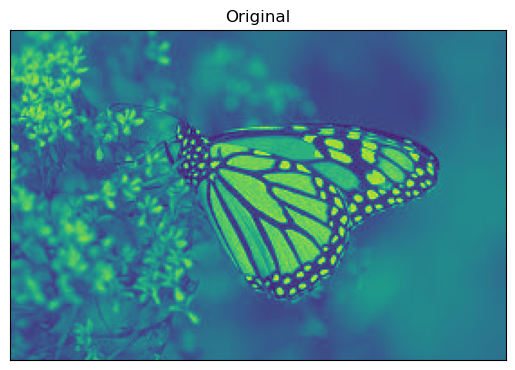

In [13]:
img = cv2.imread('dataset/imgs/butterfly.jpg', 0)
show_img('Original', img)

In [14]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()

cdf_norm = cdf * float(hist.max())/ cdf.max()


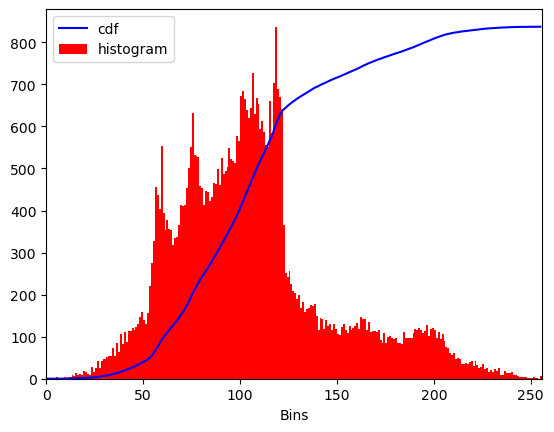

In [15]:
plt.plot(cdf_norm, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.xlabel('Bins')
plt.show()

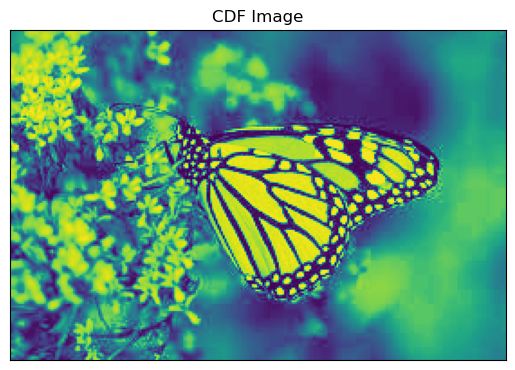

In [16]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/ (cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

img2 = cdf[img]
show_img('CDF Image', img2)

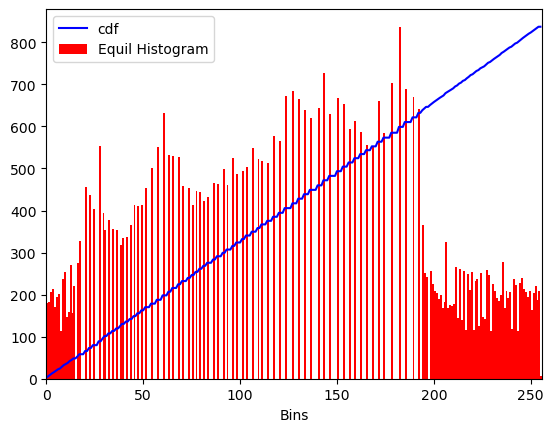

In [17]:
hist, bins = np.histogram(img2.flatten(), 256, [0, 256])
cdf = hist.cumsum()

cdf_norm = cdf * float(hist.max())/ cdf.max()

plt.plot(cdf_norm, color='b')
plt.hist(img2.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'Equil Histogram'), loc='upper left')
plt.xlabel('Bins')
plt.show()


##  OpenCV - Implementation 

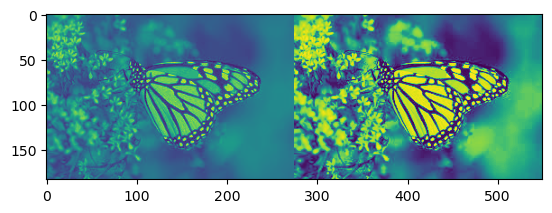

In [18]:
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
res = np.hstack((img, equ))
cv2.imwrite("ex3_result.png", res)
img = cv2.imread("ex3_result.png", 0)
plt.imshow(img)
plt.show()